# Creating New Data Points, Visualization, etc.

In [1]:
# library load
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
bach = pd.read_csv('the_bachelor.csv')
#print(bach.head())
odat = pd.read_csv('elimination_long_form.csv')
odat.head(15)

,Unnamed: 0,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
0,0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1
1,1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1
2,2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1
3,3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1
4,4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1
5,5,Bachelorette,13,13_MATT_M,ELIMINATION-1,NaN,ELIMINATION,1
6,6,Bachelorette,13,13_ALEX_B,ELIMINATION-1,NaN,ELIMINATION,1
7,7,Bachelorette,13,13_WILL_G,ELIMINATION-1,NaN,ELIMINATION,1
8,8,Bachelorette,13,13_KENNY_L,ELIMINATION-1,NaN,ELIMINATION,1
9,9,Bachelorette,13,13_ANTHONY_B,ELIMINATION-1,NaN,ELIMINATION,1


### Need to Match Up Demo Data with the Elimination/Rose/Date/Winner Data

In [3]:
# split odat CONTESTANT on "_"
odat[['CON_SEASON', 'CON_FIRST', 'CON_INIT', 'CON_OTHER']] = odat['CONTESTANT'].str.split('_',expand=True)
odat = odat[odat.SEASON != 'SEASON'].copy()
odat['SEASON'] = odat['SEASON'].astype(str).astype(int)
odat.head()
#odat[odat.CON_OTHER == 'X']
#odat.SEASON.value_counts()

,Unnamed: 0,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER,CON_SEASON,CON_FIRST,CON_INIT,CON_OTHER
0,0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1,13,BRYAN,A,None
1,1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1,13,PETER,K,None
2,2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1,13,ERIC,B,None
3,3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1,13,DEAN,U,None
4,4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1,13,ADAM,G,None


In [4]:
# split bach CONTESTANT on " ",
bach[['CON_FIRST', 'CON_LAST', 'CON_OTHER']] = bach['CONTESTANT'].str.split(' ', expand=True)
bach.head()
bach.CON_OTHER.value_counts() # last names but also (state)

# make everything uppercase 
bach.CON_FIRST = bach.CON_FIRST.str.upper()
bach.CON_LAST = bach.CON_LAST.str.upper()
bach.CON_OTHER = bach.CON_OTHER.str.upper()

# keep only first initial of last name
bach['CON_LAST2'] = bach.CON_LAST.str[0]
bach['CON_OTHER2'] = bach.CON_OTHER.str[0]
# iterate through rows in order to keep correct letter
# logic will be: if CON_OTHER2 is missing or '(', keep CON_LAST2, otherwise, keep CON_OTHER2
bach['INITIAL'] = np.where(bach.CON_OTHER2.isnull or bach.CON_OTHER2 == '(', bach.CON_LAST2, bach.CON_OTHER2)

# remove excess columns
bach = bach[['BACHELOR', 'BACHELOR_AGE', 'BACHELOR_HEIGHT', 'SEASON', 'BACHELOR_HOMETOWN_CITY', 'BACHELOR_HOMETOWN_STATE', 'CONTESTANT', 'CONTESTANT_AGE', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT', 'CONTESTANT_ELIMWEEK', 'CONTESTANT_HOMETOWN_CITY', 'CONTESTANT_HOMETOWN_STATE', 'CON_FIRST', 'INITIAL']].copy()

bach.head()

,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,CON_FIRST,INITIAL
0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS,AMANDA,M
1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL,TRISTA,R
2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX,SHANNON,O
3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ,KIM,None
4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN,CATHY,G


In [5]:
#print(odat.dtypes)
#bach.dtypes
# merge/match on first name, last initial season number
all_data = odat.merge(bach, left_on = ['SEASON', 'CON_FIRST', 'CON_INIT'], right_on = ['SEASON', 'CON_FIRST', 'INITIAL'], how='right')
all_data.head()

,Unnamed: 0,SHOW,SEASON,CONTESTANT_x,TYPE,VALUE,ELIM_DATE,NUMBER,CON_SEASON,CON_FIRST,...,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,INITIAL
0,356.0,Bachelor,21,21_DANIELLE_M,ELIMINATION-1,NaN,ELIMINATION,1.0,21,DANIELLE,...,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,M
1,1276.0,Bachelor,21,21_DANIELLE_M,ELIMINATION-2,R,ELIMINATION,2.0,21,DANIELLE,...,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,M
2,2196.0,Bachelor,21,21_DANIELLE_M,ELIMINATION-3,NaN,ELIMINATION,3.0,21,DANIELLE,...,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,M
3,3116.0,Bachelor,21,21_DANIELLE_M,ELIMINATION-4,NaN,ELIMINATION,4.0,21,DANIELLE,...,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,M
4,4036.0,Bachelor,21,21_DANIELLE_M,ELIMINATION-5,NaN,ELIMINATION,5.0,21,DANIELLE,...,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,M


In [8]:
# select out columns we want to use
all_data.columns
ad = all_data[['SHOW', 'SEASON', 'TYPE', 'VALUE', 'BACHELOR', 'BACHELOR_AGE', 'BACHELOR_HEIGHT', 'BACHELOR_HOMETOWN_CITY', 'BACHELOR_HOMETOWN_STATE', 'CONTESTANT_y', 'CONTESTANT_AGE', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT', 'CONTESTANT_ELIMWEEK', 'CONTESTANT_HOMETOWN_CITY', 'CONTESTANT_HOMETOWN_STATE']]
bach = ad[ad.SHOW == 'Bachelor'].copy()

### Variables To Create: 
* Age Difference between Contestant and Bachelor
* Age Difference between Contestant and Mean of Contestant Pool for the Season
* Binary for Same Hometown City
* Binary for Same Hometown State
* Difference in Height between Contestant and Bachelor
* Region for State
* Binary for Same State Region
* More Generalized Contestant Job (???)

In [9]:
# Age Difference between Contestant and Bachelor
bach['AGE_DIFF'] = bach['BACHELOR_AGE'] - bach['CONTESTANT_AGE']

In [10]:
# Age Difference between Contestant and Mean of Contestant Pool for the Season
bach = bach.merge(bach[['SEASON', 'CONTESTANT_AGE']].groupby(['SEASON'], as_index=False).mean(), on='SEASON', suffixes=['', '_MEAN'])
bach.head()

,SHOW,SEASON,TYPE,VALUE,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN
0,Bachelor,21,ELIMINATION-1,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0
1,Bachelor,21,ELIMINATION-2,R,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0
2,Bachelor,21,ELIMINATION-3,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0
3,Bachelor,21,ELIMINATION-4,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0
4,Bachelor,21,ELIMINATION-5,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0


In [11]:
bach['AGE_DIFF_MEAN_POOL'] = bach['CONTESTANT_AGE'] - bach['CONTESTANT_AGE_MEAN']
bach.head()

,SHOW,SEASON,TYPE,VALUE,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL
0,Bachelor,21,ELIMINATION-1,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0
1,Bachelor,21,ELIMINATION-2,R,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0
2,Bachelor,21,ELIMINATION-3,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0
3,Bachelor,21,ELIMINATION-4,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0
4,Bachelor,21,ELIMINATION-5,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,31.0,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0


In [12]:
# Age Difference between the Bachelor and the Contestant Pool
bach['AGE_DIFF_BACH_POOL'] = bach['BACHELOR_AGE'] - bach['CONTESTANT_AGE_MEAN']

## Visualization of Age Difference Variables

#### Average Age of the Contestant Pool for 16 Seasons of The Bachelor

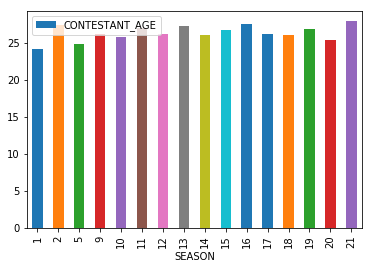

In [13]:
av_age = bach[['SEASON', 'CONTESTANT_AGE']].groupby(['SEASON'], as_index=False).mean()
av_age.plot.bar(x='SEASON', y='CONTESTANT_AGE')

#### Difference in Age Between the Bachelor and Each Contestant

In [18]:
print(bach['SEASON'].unique())

[21 20 19 18 17 16 15 14 13 12 11 10  9  5  2  1]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


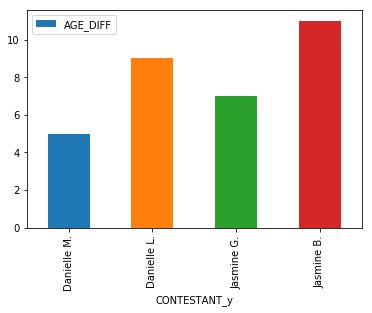

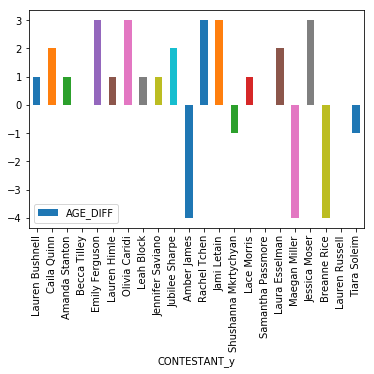

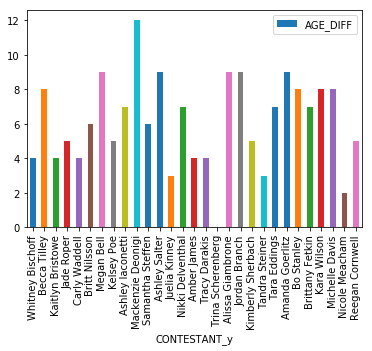

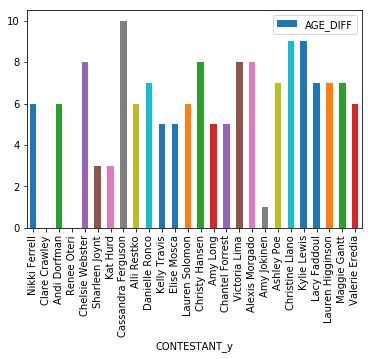

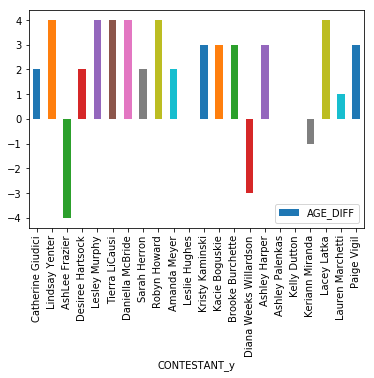

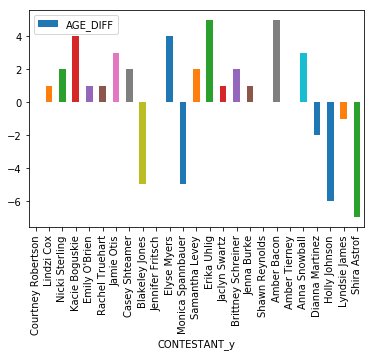

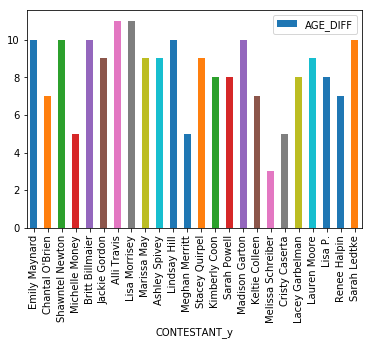

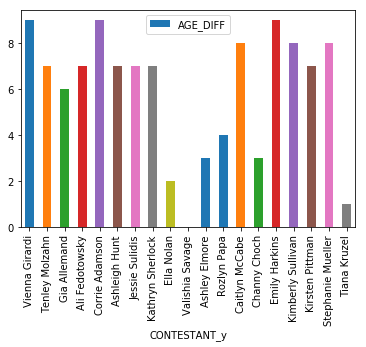

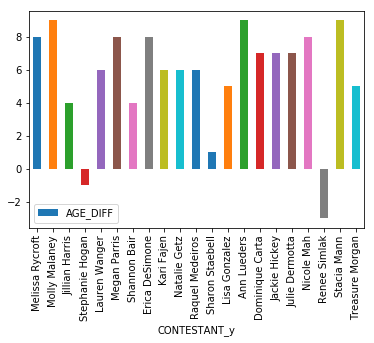

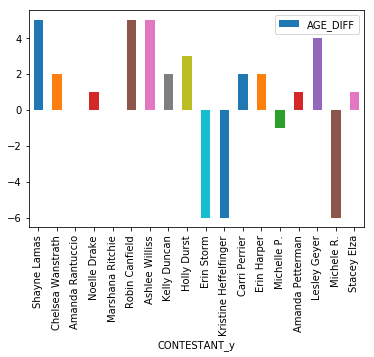

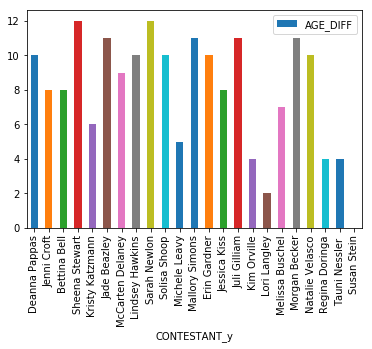

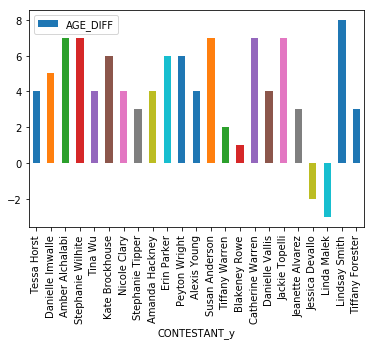

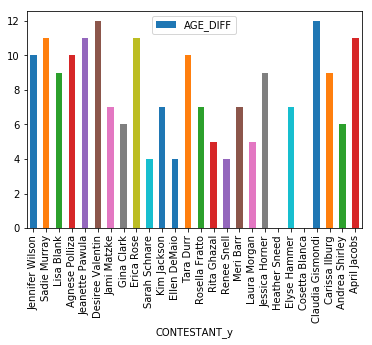

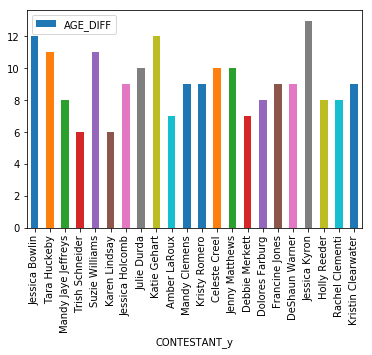

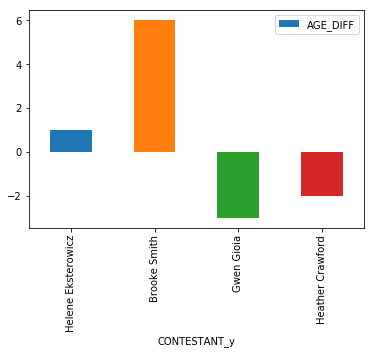

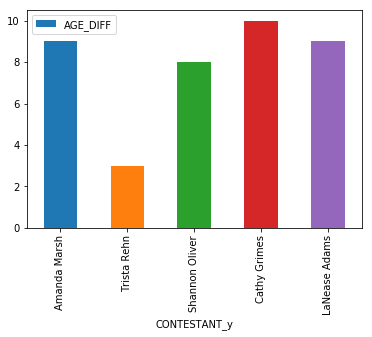

In [17]:
for each_season in bach['SEASON'].unique(): 
    age_diff_plot = bach[(bach['SEASON'] == each_season) & (bach['TYPE'] == 'ELIMINATION-1')]
    print(age_diff_plot.plot.bar(x='CONTESTANT_y', y='AGE_DIFF'))

In [23]:
# Create a categorical 'younger', 'same', 'older' variable for bachelor age vs. contestant age
bach['AGE_DIFF_CAT'] = np.where(bach['AGE_DIFF'].isnull(), 4, np.where(bach['AGE_DIFF'] > 0, 2, np.where(bach['AGE_DIFF'] == 0, 1, 0)))
bach['AGE_DIFF_CAT'].value_counts()

2    5400
0     480
1     360
4      20
Name: AGE_DIFF_CAT, dtype: int64

Contestants are
2: Younger
1: Same
0: Older
4: Missing

In [24]:
len(bach['AGE_DIFF_CAT'])

6260

In [25]:
bach.head()

,SHOW,SEASON,TYPE,VALUE,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,...,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT
0,Bachelor,21,ELIMINATION-1,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0,8.0,2
1,Bachelor,21,ELIMINATION-2,R,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0,8.0,2
2,Bachelor,21,ELIMINATION-3,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0,8.0,2
3,Bachelor,21,ELIMINATION-4,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0,8.0,2
4,Bachelor,21,ELIMINATION-5,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,Neonatal Nurse,70.0,7.0,Nashville,TN,5.0,28.0,3.0,8.0,2


In [26]:
# Binary for same city or state
bach['SAME_CITY'] = np.where(bach['BACHELOR_HOMETOWN_CITY'] == bach['CONTESTANT_HOMETOWN_CITY'], 1, 0)
bach['SAME_STATE'] = np.where(bach['BACHELOR_HOMETOWN_STATE'] == bach['BACHELOR_HOMETOWN_STATE'], 1, 0)

In [27]:
# Difference in Height
bach['HEIGHT_DIFF'] = bach['BACHELOR_HEIGHT'] - bach['CONTESTANT_HEIGHT']
bach['HEIGHT_BIN'] = np.where(bach['HEIGHT_DIFF'].isnull(), 4, np.where(bach['HEIGHT_DIFF'] > 0, 2, np.where(bach['HEIGHT_DIFF'] == 0, 1, 0)))

Contestants are: 
2: Taller
1: Same Height
0: Shorter
4: Missing

In [28]:
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

## Mapping State to Region

In [30]:
# Convert Bachelor state to region
StateRegion = []
for index, row in bach.iterrows():
    #print(row['c1'], row['c2'])
    if row['BACHELOR_HOMETOWN_STATE'] in states: 
        StateRegion.append(states[row['BACHELOR_HOMETOWN_STATE']])
    else: 
        StateRegion.append(row['BACHELOR_HOMETOWN_STATE'])
        
bach['BACHELOR_REGION'] = StateRegion
bach.head()

,SHOW,SEASON,TYPE,VALUE,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,...,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT,SAME_CITY,SAME_STATE,HEIGHT_DIFF,HEIGHT_BIN,BACHELOR_REGION
0,Bachelor,21,ELIMINATION-1,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,5.0,28.0,3.0,8.0,2,0,1,4.0,2,M
1,Bachelor,21,ELIMINATION-2,R,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,5.0,28.0,3.0,8.0,2,0,1,4.0,2,M
2,Bachelor,21,ELIMINATION-3,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,5.0,28.0,3.0,8.0,2,0,1,4.0,2,M
3,Bachelor,21,ELIMINATION-4,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,5.0,28.0,3.0,8.0,2,0,1,4.0,2,M
4,Bachelor,21,ELIMINATION-5,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,5.0,28.0,3.0,8.0,2,0,1,4.0,2,M


In [31]:
# Convert Contestant state to region
StateRegion = []
for index, row in bach.iterrows():
    #print(row['c1'], row['c2'])
    if row['CONTESTANT_HOMETOWN_STATE'] in states: 
        StateRegion.append(states[row['CONTESTANT_HOMETOWN_STATE']])
    else: 
        StateRegion.append(row['CONTESTANT_HOMETOWN_STATE'])
        
bach['CONTESTANT_REGION'] = StateRegion
bach.head()

,SHOW,SEASON,TYPE,VALUE,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT_y,...,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT,SAME_CITY,SAME_STATE,HEIGHT_DIFF,HEIGHT_BIN,BACHELOR_REGION,CONTESTANT_REGION
0,Bachelor,21,ELIMINATION-1,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,28.0,3.0,8.0,2,0,1,4.0,2,M,S
1,Bachelor,21,ELIMINATION-2,R,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,28.0,3.0,8.0,2,0,1,4.0,2,M,S
2,Bachelor,21,ELIMINATION-3,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,28.0,3.0,8.0,2,0,1,4.0,2,M,S
3,Bachelor,21,ELIMINATION-4,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,28.0,3.0,8.0,2,0,1,4.0,2,M,S
4,Bachelor,21,ELIMINATION-5,NaN,Nick Viall,36,74.0,Milwaukee,WI,Danielle M.,...,28.0,3.0,8.0,2,0,1,4.0,2,M,S


Regions: 
N - North East 
W - West 
M - Mid West 
S - South 
O - Other

In [32]:
# binary if bachelor region and contestant region are the same
bach['SAME_REGION'] = np.where(bach['BACHELOR_REGION'] == bach['CONTESTANT_REGION'], 1, 0)

In [33]:
bach.columns

Index(['SHOW', 'SEASON', 'TYPE', 'VALUE', 'BACHELOR', 'BACHELOR_AGE',
       'BACHELOR_HEIGHT', 'BACHELOR_HOMETOWN_CITY', 'BACHELOR_HOMETOWN_STATE',
       'CONTESTANT_y', 'CONTESTANT_AGE', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT',
       'CONTESTANT_ELIMWEEK', 'CONTESTANT_HOMETOWN_CITY',
       'CONTESTANT_HOMETOWN_STATE', 'AGE_DIFF', 'CONTESTANT_AGE_MEAN',
       'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_BACH_POOL', 'AGE_DIFF_CAT', 'SAME_CITY',
       'SAME_STATE', 'HEIGHT_DIFF', 'HEIGHT_BIN', 'BACHELOR_REGION',
       'CONTESTANT_REGION', 'SAME_REGION'],
      dtype='object')

## Mark the Winners

In [34]:
bach['WINNER'] = np.where(bach.CONTESTANT_ELIMWEEK.isnull(), 1, 0)

In [35]:
bach.columns

Index(['SHOW', 'SEASON', 'TYPE', 'VALUE', 'BACHELOR', 'BACHELOR_AGE',
       'BACHELOR_HEIGHT', 'BACHELOR_HOMETOWN_CITY', 'BACHELOR_HOMETOWN_STATE',
       'CONTESTANT_y', 'CONTESTANT_AGE', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT',
       'CONTESTANT_ELIMWEEK', 'CONTESTANT_HOMETOWN_CITY',
       'CONTESTANT_HOMETOWN_STATE', 'AGE_DIFF', 'CONTESTANT_AGE_MEAN',
       'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_BACH_POOL', 'AGE_DIFF_CAT', 'SAME_CITY',
       'SAME_STATE', 'HEIGHT_DIFF', 'HEIGHT_BIN', 'BACHELOR_REGION',
       'CONTESTANT_REGION', 'SAME_REGION', 'WINNER'],
      dtype='object')

### For Prediction
* Can get rid of all the bachelor columns (they are same for all seasons)
* Any of the categorical variables will need to be transformed into numbers (i think)
* Train set would be x number of full seasons
* Test set would be one season with the winner mark removed

In [37]:
# get rid of unecessary columns
bach_slim = bach[['SEASON', 'TYPE', 'VALUE', 'CONTESTANT_y', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT', 'HEIGHT_DIFF', 'HEIGHT_BIN', 'CONTESTANT_HOMETOWN_CITY', 'SAME_CITY', 'SAME_STATE', 'CONTESTANT_HOMETOWN_STATE', 'CONTESTANT_REGION', 'SAME_REGION', 'AGE_DIFF', 'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_BACH_POOL', 'AGE_DIFF_CAT', 'CONTESTANT_ELIMWEEK', 'WINNER']].copy()

In [34]:
bach_slim.dtypes

SEASON                         int64
CONTESTANT                    object
CONTESTANT_JOB                object
CONTESTANT_HEIGHT            float64
HEIGHT_DIFF                  float64
HEIGHT_BIN                     int32
CONTESTANT_HOMETOWN_CITY      object
SAME_CITY                      int32
SAME_STATE                     int32
CONTESTANT_HOMETOWN_STATE     object
CONTESTANT_REGION             object
SAME_REGION                    int32
AGE_DIFF                     float64
AGE_DIFF_MEAN_POOL           float64
AGE_DIFF_BACH_POOL           float64
AGE_DIFF_CAT                   int32
CONTESTANT_ELIMWEEK          float64
WINNER                         int32
dtype: object

In [35]:
bach_slim.to_csv("slim_set_bachelor.csv")

##### Notes
* Will probably have to change some variables to binary form if we want to use random forest
